# 共通データ

時系列データなら何でもよいので、下記のデータを利用した  
`pd.read_csv()` はURLから直接CSVデータをダウンロードできる

https://www.mhlw.go.jp/stf/covid-19/open-data.html

47都道府県ではデータが多すぎて見づらいので、東京・大阪・名古屋のみにする

In [1]:
import pandas as pd
url = "https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv"
data = pd.read_csv(url)
data = data.melt(id_vars="Date")
data.columns = ["Date", "Prefecture", "Newly confirmed cases"]
query = "Prefecture == 'Tokyo' or Prefecture == 'Osaka' or Prefecture == 'Aichi'"
data = data.query(query)
data.iloc[200:210,]

,Date,Prefecture,Newly confirmed cases
15917,2020/8/3,Tokyo,258
15918,2020/8/4,Tokyo,309
15919,2020/8/5,Tokyo,263
15920,2020/8/6,Tokyo,360
15921,2020/8/7,Tokyo,461
15922,2020/8/8,Tokyo,429
15923,2020/8/9,Tokyo,331
15924,2020/8/10,Tokyo,197
15925,2020/8/11,Tokyo,188
15926,2020/8/12,Tokyo,222


たいていのライブラリは日付が　`str` のままでは時系列処理できないので `Timestamp` に変換する  
（Seaborn は `str` でも時系列グラフを描画できた）

In [2]:
Date = pd.to_datetime(data["Date"])
data2 = data.copy()
data2["Date"] = Date

print(type(data.iloc[0,0]))
print(type(data2.iloc[0,0]))

data2.iloc[200:210,] #見た目は同じ　

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,Date,Prefecture,Newly confirmed cases
15917,2020-08-03,Tokyo,258
15918,2020-08-04,Tokyo,309
15919,2020-08-05,Tokyo,263
15920,2020-08-06,Tokyo,360
15921,2020-08-07,Tokyo,461
15922,2020-08-08,Tokyo,429
15923,2020-08-09,Tokyo,331
15924,2020-08-10,Tokyo,197
15925,2020-08-11,Tokyo,188
15926,2020-08-12,Tokyo,222


In [3]:
data_yoko = data2.pivot(index="Date",
                        columns="Prefecture",
                        values="Newly confirmed cases")
data_yoko

Prefecture,Aichi,Osaka,Tokyo
Date,,,
2020-01-16,0,0,0
2020-01-17,0,0,0
2020-01-18,0,0,0
2020-01-19,0,0,0
2020-01-20,0,0,0
...,...,...,...
2023-05-04,221,499,994
2023-05-05,252,440,906
2023-05-06,282,430,1062


## 高水準作図ライブラリ

## Seaborn

Seaborn は matplotlib のラッパー。データフレームからシンプルな関数で様々なグラフを描画できる

色遣いがきれいで、デフォルトでもカッコよいグラフが描けるのが特徴。  
グラフごとに微妙に作法が違っていたりして、使い込むとやや洗練されていない印象を受ける。  
足りない部分は matplotlib で調整できる/する必要があるのが、長所でもあり短所でもある。  
また、デフォルトでは日本語が文字化けするのが面倒。  

https://seaborn.pydata.org/

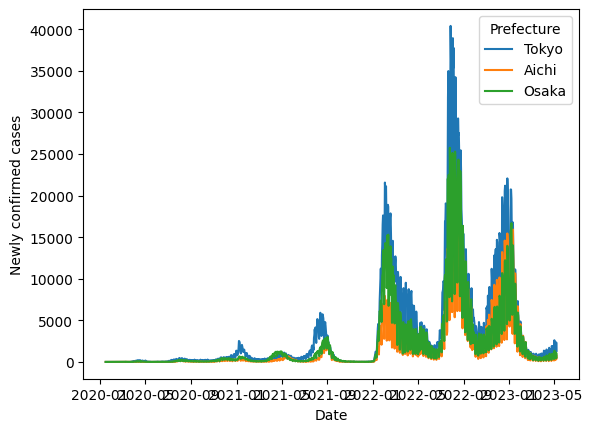

In [4]:
# minimum
import seaborn as sns
ax = sns.lineplot(data=data2,
             x="Date",
             y="Newly confirmed cases",
             hue="Prefecture")

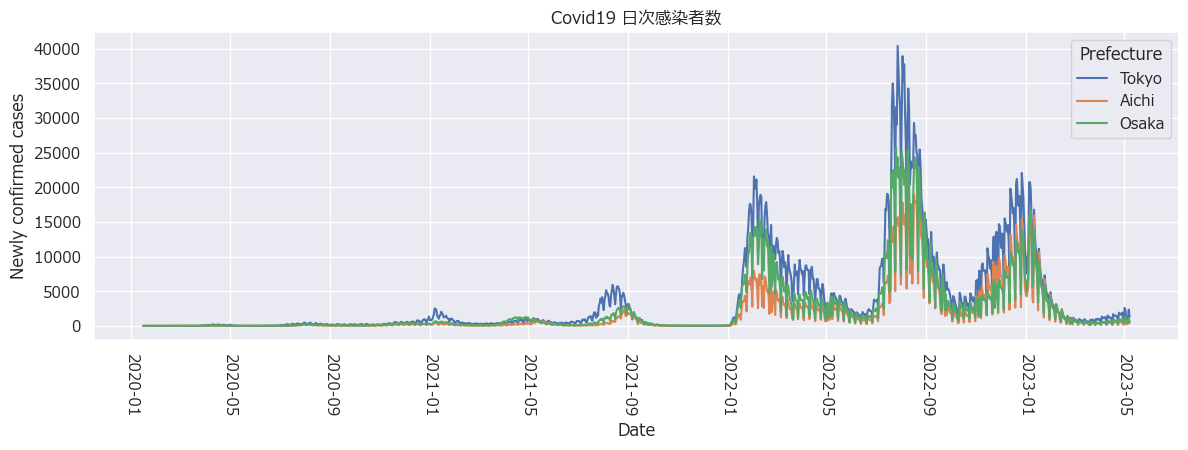

In [5]:
#practical
import seaborn as sns
import matplotlib.pyplot as plt
# 日本語文字化け対応でフォントを指定する。matplotlib に比べれば楽。
sns.set(font='Meiryo')
# 画像サイズを設定する程度の事で matplotlib を呼ぶのが面倒
# グラフ描画より前に画像サイズを設定する必要があるなど、matplotlib のお作法に縛られる
plt.figure(figsize=[14,4]) 
# グラフ描画の関数はシンプルでとっつきやすい
ax = sns.lineplot(data=data2,
             x="Date",
             y="Newly confirmed cases",
             hue="Prefecture")
ax.set_title("Covid19 日次感染者数")
plt.xticks(rotation=-90)
plt.show()
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


## Seaborn Object

2022年に導入された Seaborn のグラフィック指向インターフェイス。  
ざっくり言って、Seaborn で ggplot/plotnine 的な書き方ができるようになる。

- [The seaborn.objects interface](https://seaborn.pydata.org/tutorial/objects_interface.html)
  - [plot](https://seaborn.pydata.org/generated/seaborn.objects.Plot.html)
  - [lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html)
  - [layout](https://seaborn.pydata.org/generated/seaborn.objects.Plot.layout.html)
  - [label](https://seaborn.pydata.org/generated/seaborn.objects.Plot.label.html#seaborn-objects-plot-label)
- [Seaborn Objects ~ グラフィックの文法で強化された Python 可視化ライブラリの新形態 ~](https://recruit.gmo.jp/engineer/jisedai/blog/seaborn-objects/)
- [Seabornのオブジェクト・インターフェイスのガイド](https://qiita.com/nkay/items/ab5beea96e8648aeab63)

#### minimum
`seaborn` に含まれているので、新たに別ライブラリをインストールしないで済むのは嬉しい  
ワンライナーだとかえって複雑に見えて有難味が分からないが……


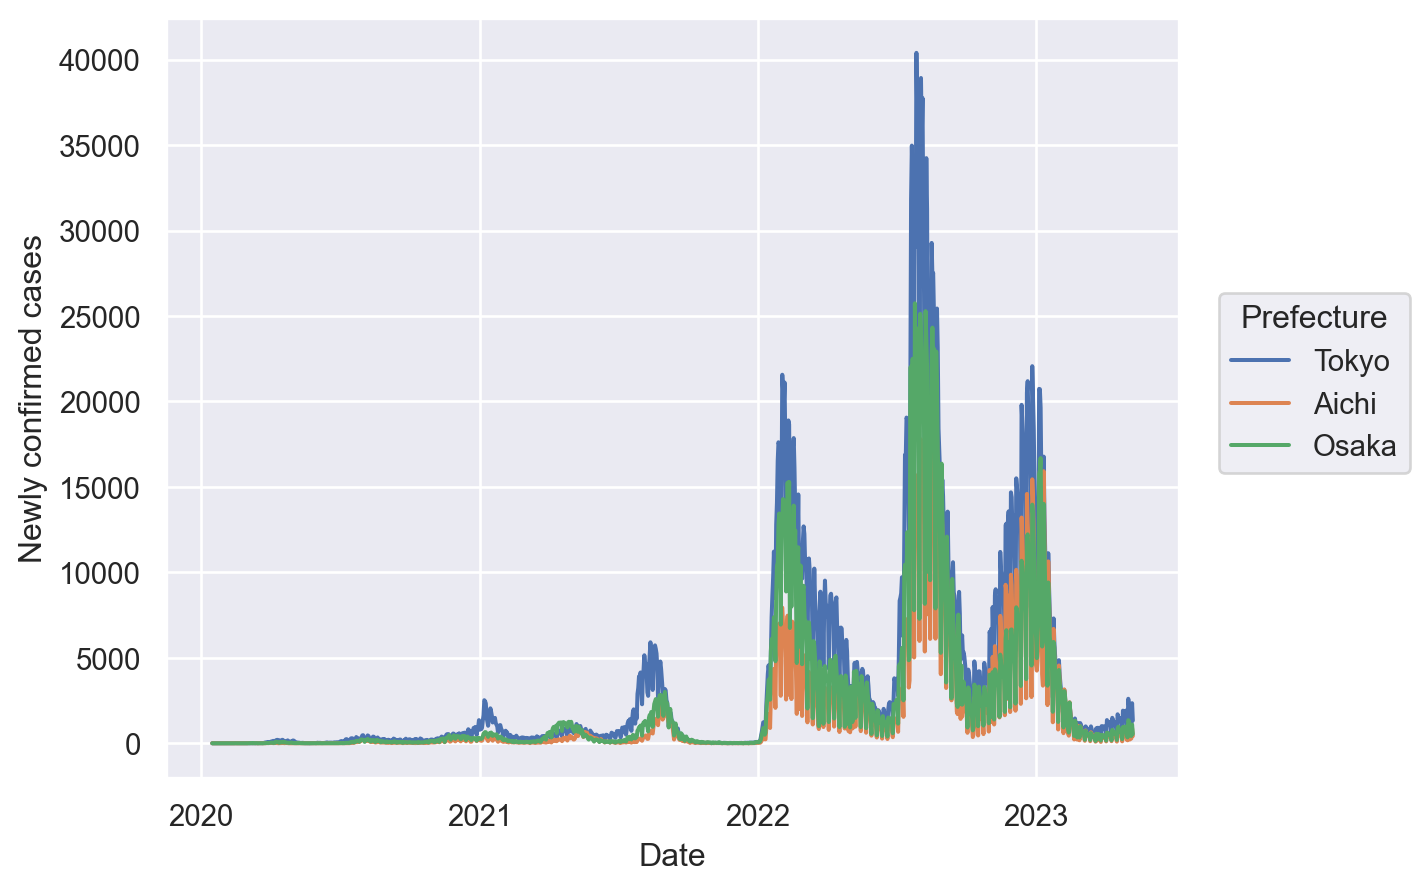

In [6]:
#minimum
import seaborn.objects as so
so.Plot(data2, x="Date", y="Newly confirmed cases", color="Prefecture").add(so.Line())

#### Practical

実務的な設定をしようと思うと見通しが格段に良くなって有難味が分かる。

- pros
  - 関数呼び出しのカッコごとに改行してメソッドチェーンすると読みやすい。   
  - グラフサイズが Seaborn 内で設定できるようになったのが嬉しい（元々できてろよという気もするが…） 
- cons
  - 依然としてデフォルトでは日本語非対応 
  - 日本語フォントの設定は matplotlib の rc 設定を弄っており、おまじないレベルだがちょっと面倒くさい。

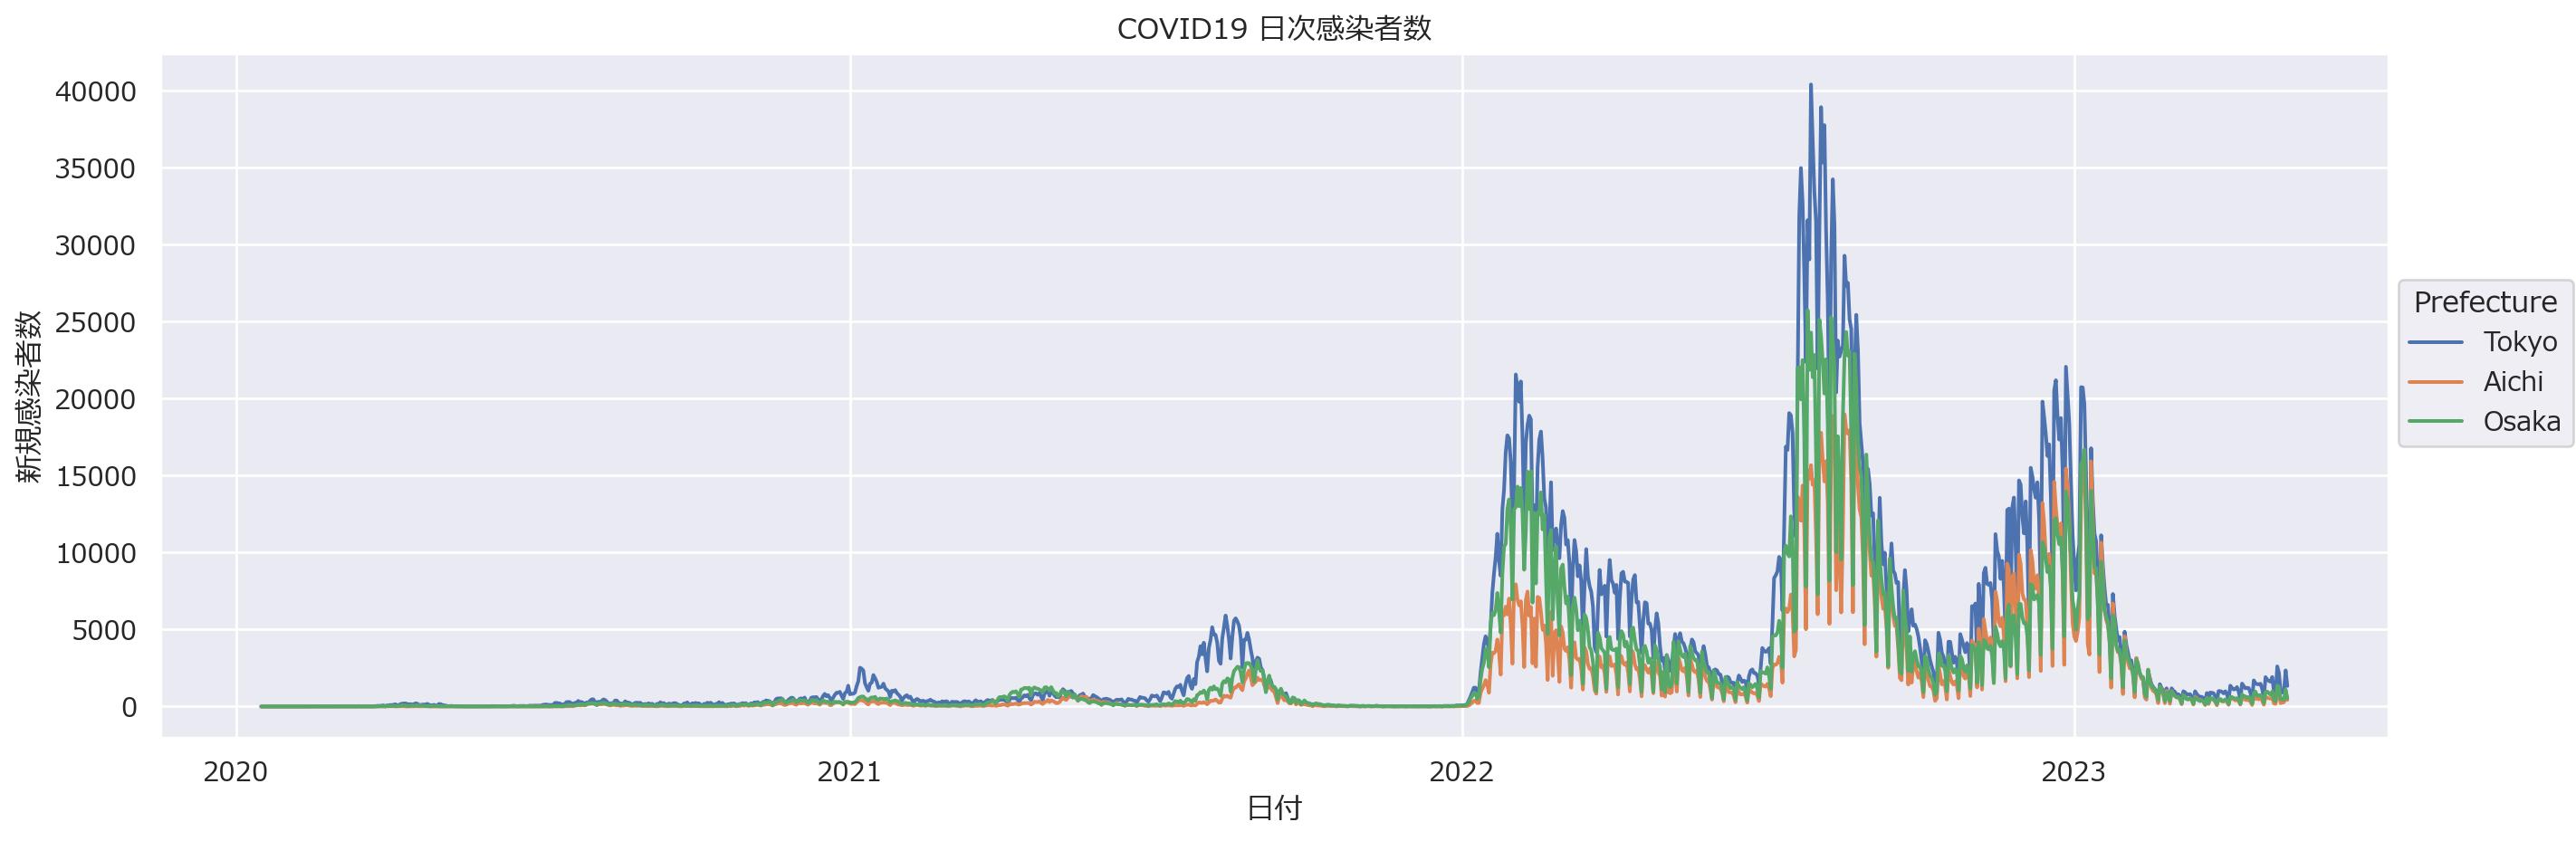

In [7]:
import seaborn.objects as so
so.Plot(
    data2, x="Date", y="Newly confirmed cases", color="Prefecture",
).add(
    so.Line()
).layout(
    size=(14,5)
).label(
    title="COVID19 日次感染者数",
    x="日付",
    y="新規感染者数"
).theme(
    {"font.family":"Meiryo"}
)

## plotnine

plotnine は R のグラフ描画パッケージである ggplot2 をほぼ完璧に python に移植した matplotlib のラッパー。  
文法が ggplot2 なので、最初はとっつきにくいが、完全に構造化されていて慣れると覚えやすい（はず）

オブジェクトに `+=` で指示を追加していくので、指示が長くなっても見通しが良い。

### 公式ドキュメント類

* https://plotnine.readthedocs.io/en/stable/index.html

### 参考サイト

* https://ill-identified.hatenablog.com/entry/2021/08/06/200859
* [plotnine example](https://endogi.info/plotnine-example.html)

#### minimum
最小構成ではやはり有難味が分かりにくい

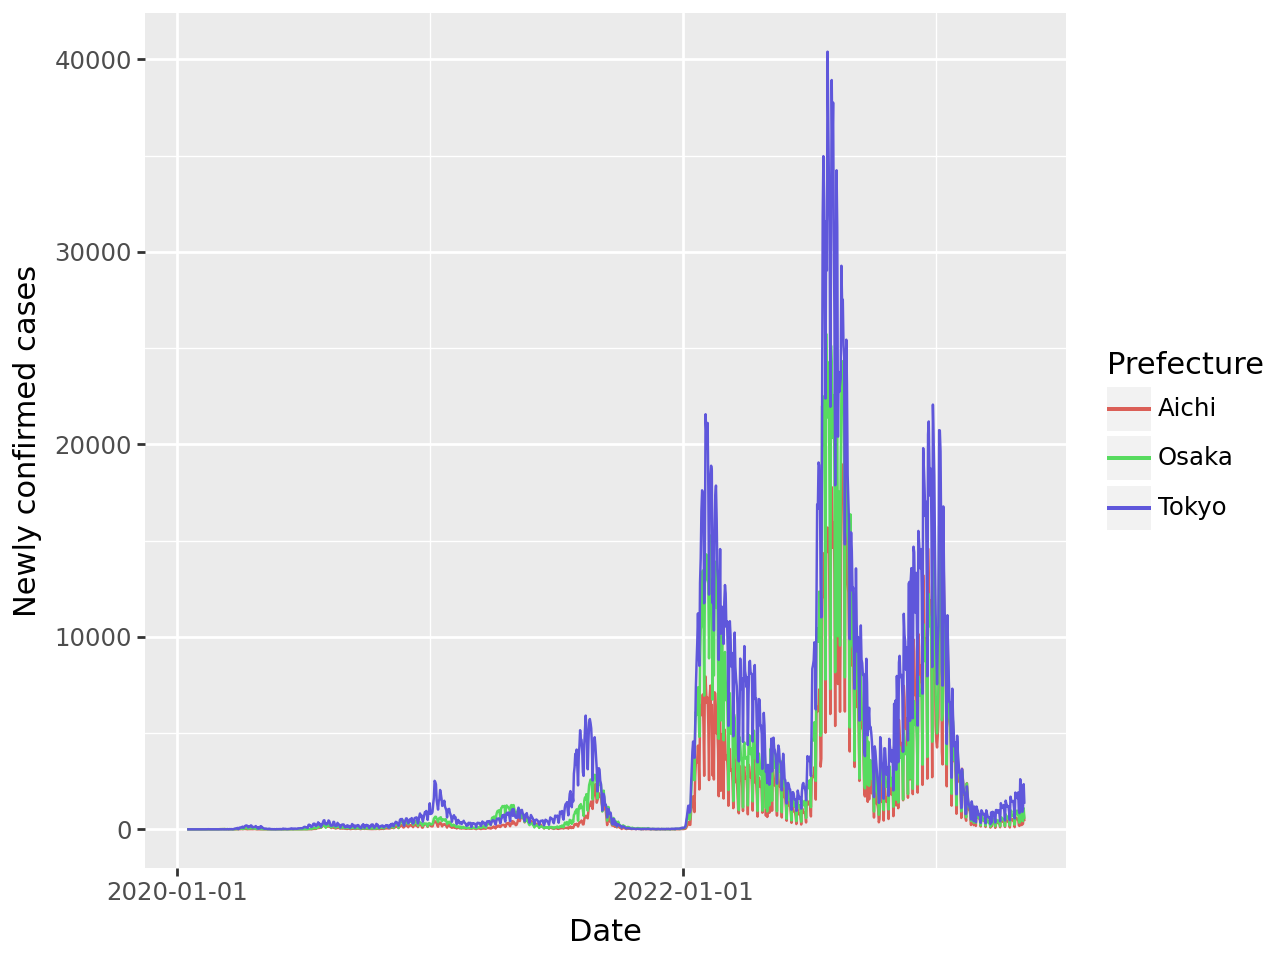

In [8]:
from plotnine import *
# データとプロット対象を指定
g = ggplot(data2, aes(x="Date", y="Newly confirmed cases", color="Prefecture"))
# グラフの種類を指定
g += geom_line()
g

#### Practical

実務的にはこれくらいのコードになる

- [日付の目盛設定](https://plotnine.org/tutorials/miscellaneous-manipulating-date-breaks-and-date-labels.html)
  - [別ライブラリ (mizani) のインストールが必要で少々面倒](https://mizani.readthedocs.io/en/stable/)
  
- Pros
  - 後から要素を次々につなげていくことで
- Cons
  - パラメータの書き方がかなり癖があって調べながら出ないとよくわからない
  - plotnine をワイルドカードインポートするのがR風

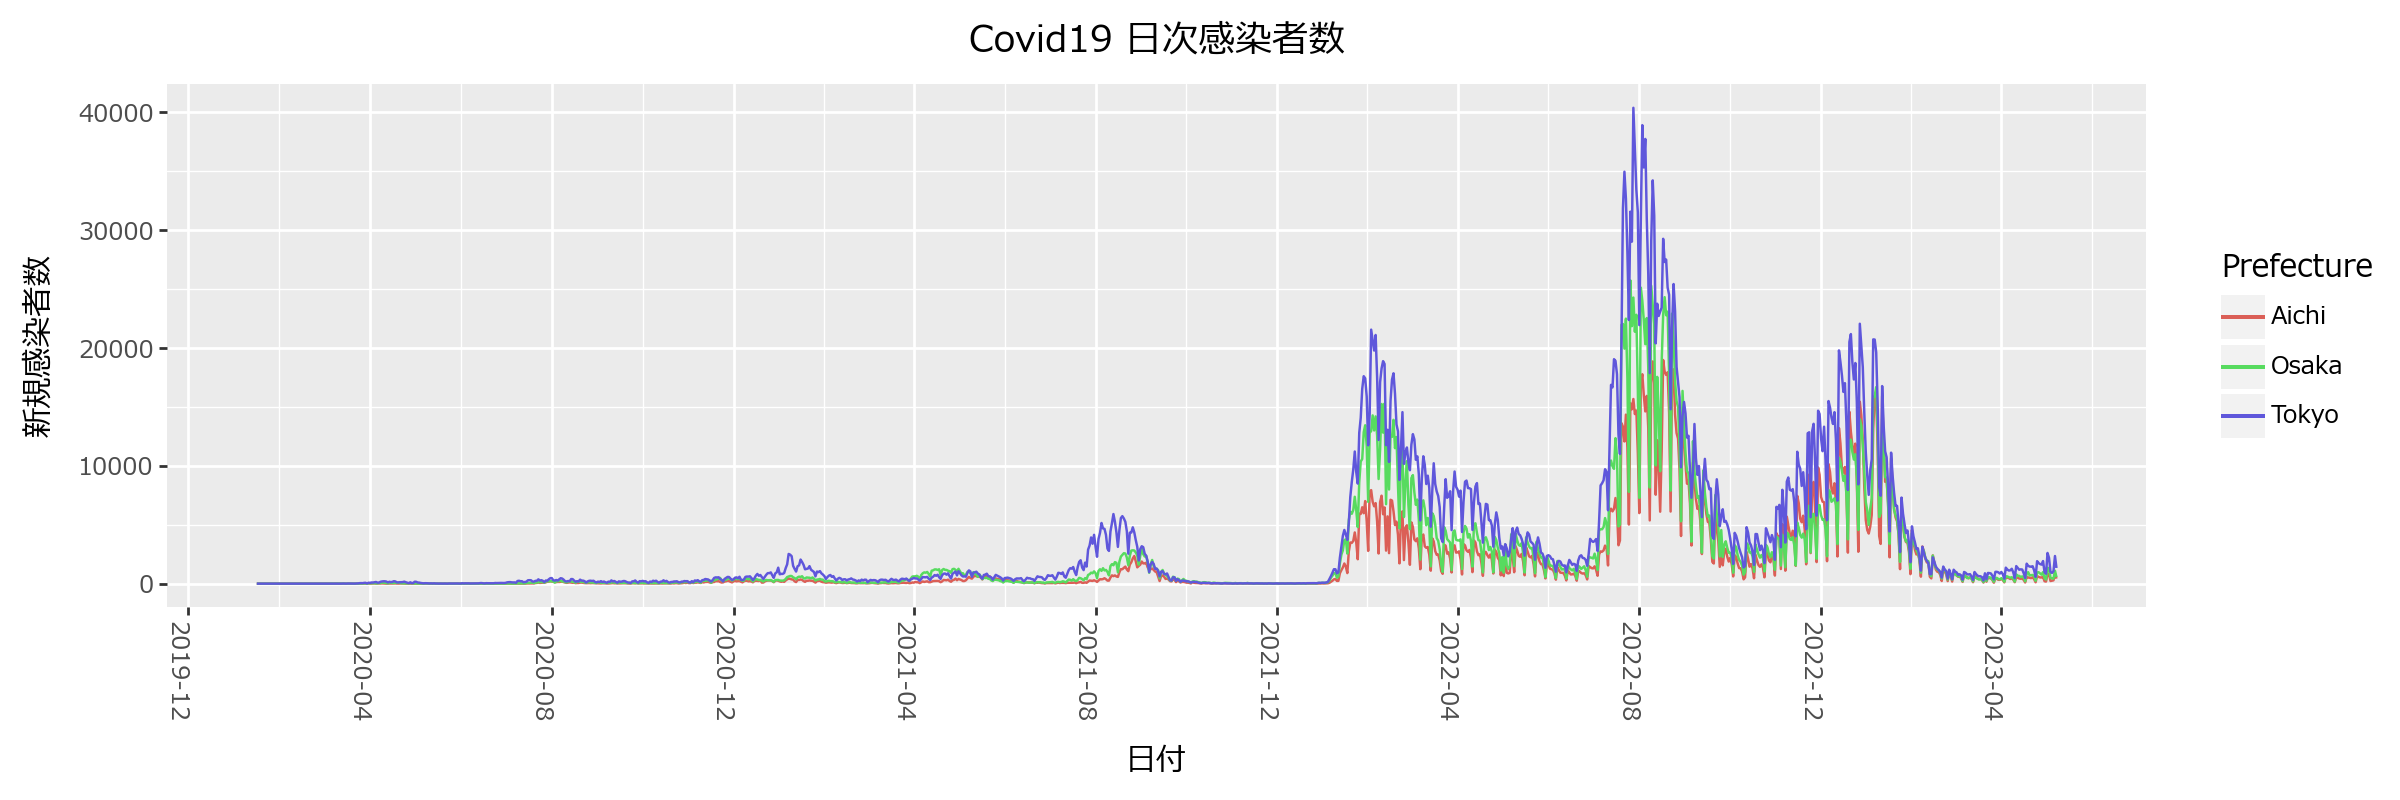

In [9]:
#practical
from plotnine import *
from mizani.breaks import date_breaks
from mizani.formatters import date_format

# データとプロット対象を指定
g = ggplot(data2, aes(x="Date", y='Newly confirmed cases', color="Prefecture"))
# グラフの種類を指定
g += geom_line()
# 見た目の調整を指定
g += theme(figure_size=(12, 4), text=element_text(family='Meiryo'))
g += theme(axis_text_x=element_text(rotation=-90, hjust=1))
g += labs(x='日付', y="新規感染者数", title="Covid19 日次感染者数")
g += scale_x_datetime(breaks=date_breaks("4 month"), labels=date_format("%Y-%m"))
g #描画

## Pandas 

Pandas にも matplotlib を利用した作図関数があり、単純なプロットなら Pandas だけで描画できる。  
ほかのライブラリをインストールするのが難しい時などに使えそう。

高水準作図ライブラリは縦持ちデータをそのまま処理できるのが普通だが、Pandasは横持データしか処理できないようだ（詳しくは未調査）

こいつのおかげで「Pandasしか必要ないのに matplotlib がインストールされた？」という事になる。

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

#### minimum

<Axes: xlabel='Date'>

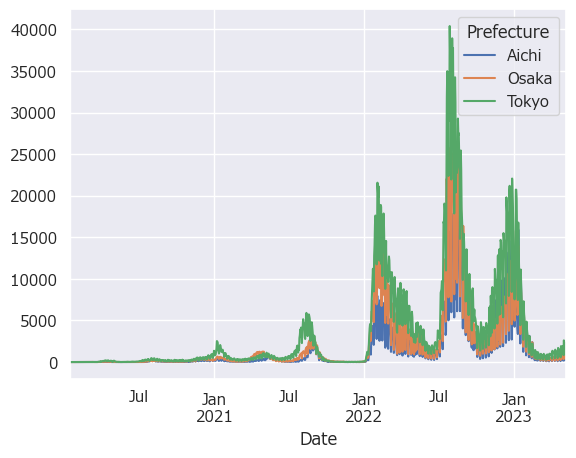

In [10]:
#minimum
data_yoko.plot.line()

#### Practical

実用的にはサイズを指定するくらいがせいぜいか？

<Axes: xlabel='Date'>

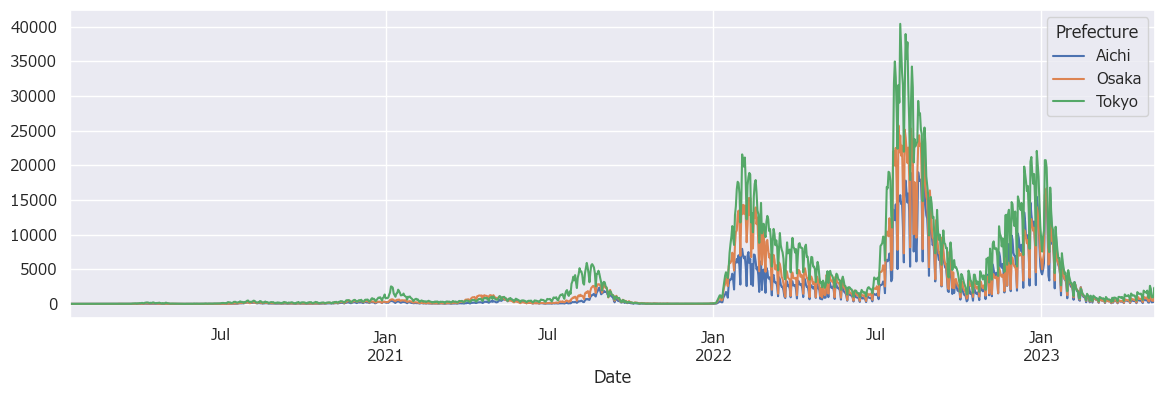

In [11]:
#practical
data_yoko.plot.line(figsize=(14,4))

## Plotly Express

Plotly Express は Ploty をバックエンドにした高水準作図ライブラリ。  
Ploty をインストールすると一緒にインストールされる。  
関数はシンプルでわかりやすい。表示されるグラフは javascript でインタラクティブに操作できる。

Seaborn/matplotlib の様に PlotlyExpress も plotly の関数を使って細かい調整などもできるようである。

### 公式ドキュメント

* https://plotly.com/python/plotly-express/

### 参考サイト

* https://qiita.com/hanon/items/d8cbe25aa8f3a9347b0b

#### minimum
最低限構成で描画してもかなりサマになる。横幅を目いっぱい使うのがPlotly流。

In [12]:
import plotly.express as px
fig = px.line(data,
              x = "Date",
              y = "Newly confirmed cases",
              color= "Prefecture",
             )
fig.show()

#### Practical
Plotlyは日本語がそのまま通るのが美点

In [13]:
import plotly.express as px
fig = px.line(data,
              x = "Date",
              y = "Newly confirmed cases",
              color= "Prefecture",
              hover_name = "Prefecture",
              title = "Covid19 日次感染者数", 
              width = 1200,
              height = 450,
             )
fig.show()

## Altair

Altair（アルタイル） は javascript の作図ライブラリ Vega をバックエンドとした宣言型統計可視化ライブラリ

よく調査できていないが、宣言型という事で系統だったインターフェースが期待できる  
メソッドチェーンで指示を記載していくので、コマンドが横長に広がるのがやや難に感じられる   
描画されるグラフは matplot 系や plotly 系ともちょっと違ったカッコよさがあり、新鮮  

### 公式ドキュメント

* https://altair-viz.github.io/
* https://altair-viz.github.io/user_guide/times_and_dates.html

### 参考サイト

* https://yuunagi.hatenablog.com/entry/2019/04/07/231734
* [How to Create Interactive Plots with Altair（2020年の記事）](https://towardsdatascience.com/how-to-create-interactive-and-elegant-plot-with-altair-8dd87a890f2a)

#### minimal
Plotly よりちょっと記述多め

In [14]:
import altair as alt

alt.renderers.enable('html') # Notebook の Html保存に必要

alt.Chart(data2).mark_line().encode(
    x='Date',
    y='Newly confirmed cases',
    color='Prefecture',
)

alt.Chart(...)

#### Practical

- Pros
  - 見た目はなかなか格好良い。
- Cons
  - 凝ったことをしようとすると `Prefecture:N` `Date:T` みたいに型情報を指定してあげないといけないのがイマイチ
  - Plotly ではデフォルトで有効になっているホバーやズームをいちいち設定する必要がある

In [15]:
#practical
import altair as alt

alt.renderers.enable('html') #Notebook の Html 保存に必要

zoom = alt.selection_interval(bind='scales')
alt.Chart(data2).mark_line().encode(
    x='Date',
    y='Newly confirmed cases',
    color='Prefecture',
    strokeDash='Prefecture',
    tooltip = [alt.Tooltip('Prefecture:N'),
               alt.Tooltip('Date:T'),
               alt.Tooltip('Newly confirmed cases:Q')
              ]
).properties(
    width=1000,
    height=400
).add_params(
    zoom
).interactive()

alt.Chart(...)

## HvPlot

HvPlot は Holoview をバックエンドとする高水準作図API。

Holoview はさらにバックエンドとして matplotlib/plotly/bokeh を選べるのが特徴で、HvPlot も同様。

表示されるグラフはbokeh / plotly で作図されている場合はインタラクティブに操作できる。

あまりよく調査できていないのだが、pandas の plot 関数を置き換えるような使い方をする。
APIは構造的でなく、いまひとつ洗練されていないように見受けられる。

bokeh をバックエンドに使う高水準作図ライブラリはほかに見つけれれていないので、bokeh が好きなら良いかもしれない。

### 公式ドキュメント

* https://hvplot.holoviz.org/index.html
* https://hvplot.holoviz.org/user_guide/Plotting.html

In [16]:
import hvplot
import hvplot.pandas 
hvplot.extension('bokeh') #デフォルトではbokeh
data_yoko.hvplot.line(x="Date",
                      y=["Tokyo", "Osaka", "Aichi"],
                      width=1200,
                      height=400,
                     )

:NdOverlay   [Prefecture]
   :Curve   [Date]   (value)

In [17]:
# import hvplot
import hvplot.pandas 
hvplot.extension('plotly') 
data_yoko.hvplot.line(x="Date",
                      y=["Tokyo", "Osaka", "Aichi"],
                      width=1200,
                      height=400,
                     )

:NdOverlay   [Prefecture]
   :Curve   [Date]   (value)

:NdOverlay   [Prefecture]
   :Curve   [Date]   (value)
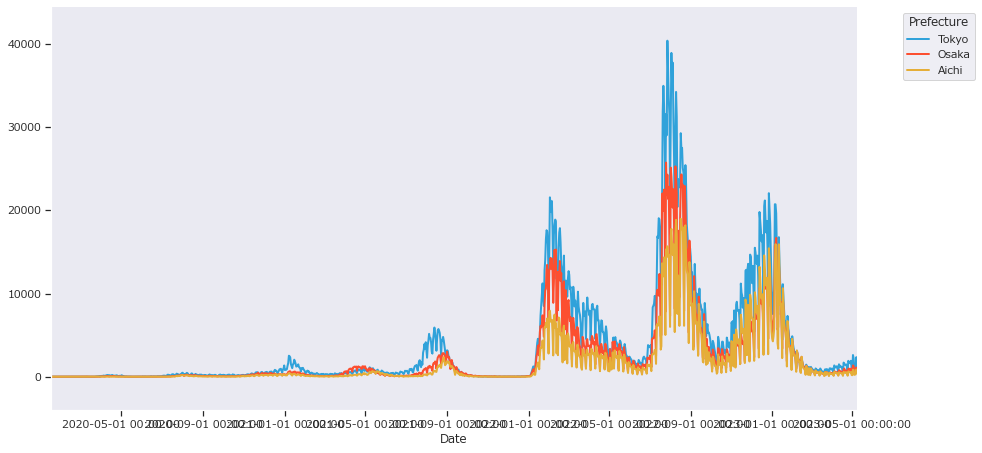

In [18]:
# import hvplot
import hvplot.pandas 
hvplot.extension('matplotlib') 
data_yoko.hvplot.line(x="Date",
                      y=["Tokyo", "Osaka", "Aichi"],
                      width=1200,
                      height=600,
                     )

## 低水準作図ライブラリ

## Holoview

Holoview は bokeh/plotly/matplotlib をバックエンドに選択できる低水準？作図ライブラリ。    
バックエンドが選択できる以外にどういうメリットがあるのかイマイチ良くわからない

### 公式ドキュメント

* https://holoviews.org/
* https://holoviews.org/user_guide/Customizing_Plots.html
* https://twitter.com/HoloViews

### 解説記事

* [Pythonの可視化ツールはHoloViewsが標準になるかもしれない（2017年の記事）](https://qiita.com/driller/items/53be86cea3c3201e7e0f)
* [HoloViewsの基本的なグラフをワンライナーで（2017年の記事）](https://qiita.com/driller/items/c21200460548235fa1db)
* [HoloViewsとBokehでぐりぐり動かせるグラフを描く（2021年の記事）](https://qiita.com/hisakichi95/items/8be61af4e141d11a77d9)
* [For HoloMap legend_positions [right, left, top, bottom] not working #4191](https://github.com/holoviz/holoviews/issues/4191)

In [19]:
# 作図指示の都合上、データフレームの形式を簡単にします
data_yoko2 = data_yoko.reset_index()
data_yoko2

Prefecture,Date,Aichi,Osaka,Tokyo
0,2020-01-16,0,0,0
1,2020-01-17,0,0,0
2,2020-01-18,0,0,0
3,2020-01-19,0,0,0
4,2020-01-20,0,0,0
...,...,...,...,...
1204,2023-05-04,221,499,994
1205,2023-05-05,252,440,906
1206,2023-05-06,282,430,1062
1207,2023-05-07,863,1098,2345


### Holoviews + bokeh

bokeh との組み合わせが一番整備されているようである

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
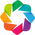

:Overlay
   .Curve.Tokyo :Curve   [Date]   (Newly confirmed cases)
   .Curve.Osaka :Curve   [x]   (y)
   .Curve.Aichi :Curve   [x]   (y)

In [20]:
import holoviews as hv
hv.extension('bokeh')

hv.Overlay([
hv.Curve((data_yoko2["Date"],data_yoko2["Tokyo"]), "Date", "Newly confirmed cases", label="Tokyo"),
hv.Curve((data_yoko2["Date"],data_yoko2["Osaka"]), label="Osaka"),
hv.Curve((data_yoko2["Date"],data_yoko2["Aichi"]), label="Aichi"),
]).opts(width=1200, height=400, legend_position='top_left')

### Holoviews + Plotly

Plotly では凡例が出てこない

In [21]:
hv.extension('plotly')

hv.Overlay([
hv.Curve((data_yoko2["Date"],data_yoko2["Tokyo"]), "Date", "Newly confirmed cases", label="Tokyo"),
hv.Curve((data_yoko2["Date"],data_yoko2["Osaka"]), label="Osaka"),
hv.Curve((data_yoko2["Date"],data_yoko2["Aichi"]), label="Aichi"),
]).opts(width=1200, height=400, legend_position='top_left')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

:Overlay
   .Curve.Tokyo :Curve   [Date]   (Newly confirmed cases)
   .Curve.Osaka :Curve   [x]   (y)
   .Curve.Aichi :Curve   [x]   (y)

### Holoviews + matplotlib
matplotlib ではピクセルで大きさの指定ができず、インチとアスペクト比の指定となる。  
そこでAPIが共通化されていなくてどうするのだ、という印象。

* http://holoviews.org/user_guide/Plotting_with_Matplotlib.html

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

:Overlay
   .Curve.Tokyo :Curve   [Date]   (Newly confirmed cases)
   .Curve.Osaka :Curve   [x]   (y)
   .Curve.Aichi :Curve   [x]   (y)
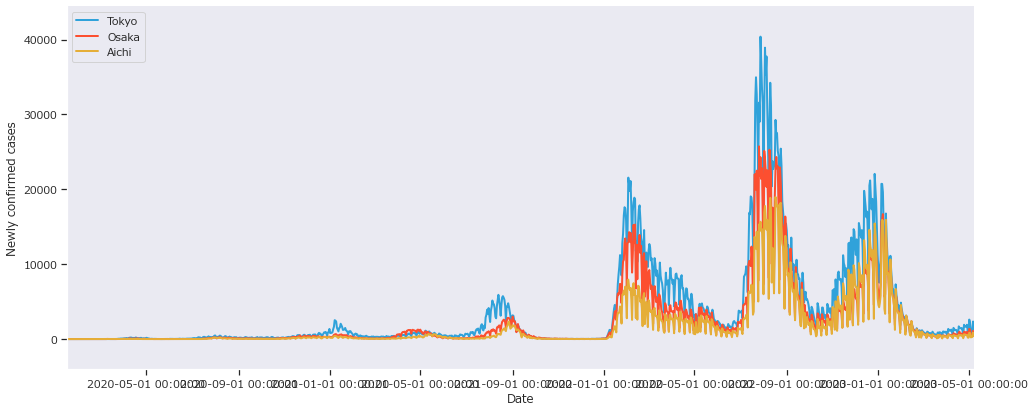

In [22]:
hv.extension('matplotlib')

hv.Overlay([
hv.Curve((data_yoko2["Date"],data_yoko2["Tokyo"]), "Date", "Newly confirmed cases", label="Tokyo"),
hv.Curve((data_yoko2["Date"],data_yoko2["Osaka"]), label="Osaka"),
hv.Curve((data_yoko2["Date"],data_yoko2["Aichi"]), label="Aichi"),
]).opts(aspect=2.5, fig_inches=18, legend_position='top_left')

## Plotly

Plotly は javascript によるグラフ描画ライブラリ  
インタラクティブに操作できるグラフを描画できる  
Python 以外に R/Matlab/Julia で利用することができる。

R では ggplot 風のインターフェースを備えた[ggplotly](https://plotly.com/ggplot2/)というのもある

### 公式サイト

* https://plotly.com/graphing-libraries/
* https://plotly.com/python/

In [23]:
#minimal
import plotly.graph_objects as go
 
fig = go.Figure()

trace0 = go.Scatter(x = data_yoko2["Date"], y = data_yoko2["Tokyo"], mode = 'lines')
trace1 = go.Scatter(x = data_yoko2["Date"], y = data_yoko2["Aichi"], mode = 'lines')
trace2 = go.Scatter(x = data_yoko2["Date"], y = data_yoko2["Osaka"], mode = 'lines')
fig.add_trace(trace0)
fig.add_trace(trace1)
fig.add_trace(trace2)

fig.show()

In [24]:
#practical
import plotly.graph_objects as go
 
fig = go.Figure()

trace0 = go.Scatter(x = data_yoko2["Date"], y = data_yoko2["Tokyo"], mode = 'lines', name = 'Tokyo')
trace1 = go.Scatter(x = data_yoko2["Date"], y = data_yoko2["Aichi"], mode = 'lines', name = 'Aichi')
trace2 = go.Scatter(x = data_yoko2["Date"], y = data_yoko2["Osaka"], mode = 'lines', name = 'Osaka')
fig.add_trace(trace0)
fig.add_trace(trace1)
fig.add_trace(trace2)

fig.layout.update({'title': '新規感染者数推移'})
fig.layout.xaxis.update({'title': '日付'})
fig.layout.yaxis.update({'title': '新規感染者数'})
fig.update_layout(
    autosize=False,
    width=1200,
    height=450)
fig.show()

## bokeh

bokeh も javascript によるグラフ描画ライブラリ  
インタラクティブに操作できるグラフを描画できる 

色々凝った設定ができるが、設定が難しすぎる印象。  
matplotlib でさえ勝手にやってくれる線の色分けも手作業で設定が必要。


### 公式サイト

* http://docs.bokeh.org/en/latest/

### 参考記事

* [Pythonでボケ(Bokeh)よう ～ データ可視化ライブラリの紹介 ～（2019年の記事）](https://qiita.com/yuji38kwmt/items/4edf1d87568a860fc3b8)
* [[Python]bokehのグラフをmatplotlibと同じ色で描画(bokeh.palettes)（2021年の記事）](https://qiita.com/deepgreenAN/items/cae8bf1bbd178fe03d21)
* [Position of the legend in a Bokeh plot](https://stackoverflow.com/questions/26254619/position-of-the-legend-in-a-bokeh-plot)
* [HoverTool does not display datetime #8658](https://github.com/bokeh/bokeh/issues/8658)

In [25]:
#minimal
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

output_notebook() #jupyter notebook 対応

p = figure()
p.line(data_yoko2.Date, data_yoko2.Tokyo)
p.line(data_yoko2.Date, data_yoko2.Aichi)
p.line(data_yoko2.Date, data_yoko2.Osaka)

show(p)

Loading BokehJS ...

In [26]:
#plactical
from bokeh.plotting import figure, show
from bokeh.models import HoverTool
from bokeh.palettes import d3
from bokeh.io import output_notebook

output_notebook() #jupyter notebook 対応

# デフォルトで色分けしてくれないため色の設定を取ってくる必要がある
colors = d3["Category10"][10]

# ツールチップ周りの設定が異様に難しい。
hover_tool = HoverTool(
    tooltips = [
        ( 'Date', '$x{%F}' ),
        ( 'Prefecture',''),
        ( '新規感染者数',  '@y' ), 
    ],
    formatters={'$x': 'datetime'}
)

p = figure(title="新規感染者数の推移",
           y_axis_label="新規感染者数",
           x_axis_label="日付",
           x_axis_type='datetime',
           width=1200,
           height=450)

p.line(data_yoko2.Date, data_yoko2.Tokyo, legend_label="Tokyo", line_color=colors[0])
p.line(data_yoko2.Date, data_yoko2.Aichi, legend_label="Aichi", line_color=colors[1])
p.line(data_yoko2.Date, data_yoko2.Osaka, legend_label="Osaka", line_color=colors[2])
p.add_layout(p.legend[0], 'right')
p.add_tools(hover_tool)
show(p)

Loading BokehJS ...

## matplotlib

当たり前だが、なんでも描ける。

### 公式サイト

* https://matplotlib.org/
* https://twitter.com/matplotlib

### 参考記事

* 調べればいくらでも出てくるので……

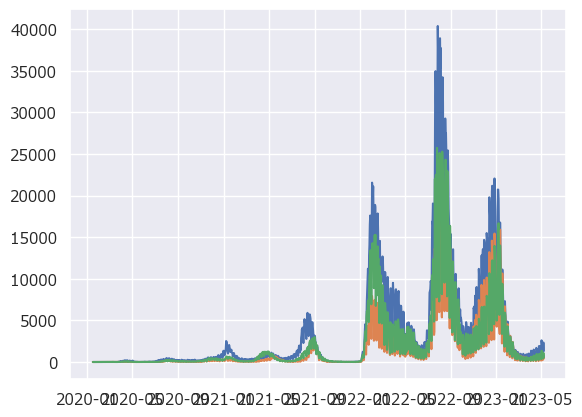

In [27]:
#minimum
%matplotlib inline 
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(data_yoko2.Date, data_yoko2.Tokyo, label="Tokyo")
ax.plot(data_yoko2.Date, data_yoko2.Aichi, label="Aichi")
ax.plot(data_yoko2.Date, data_yoko2.Osaka, label="Osaka")
plt.show()


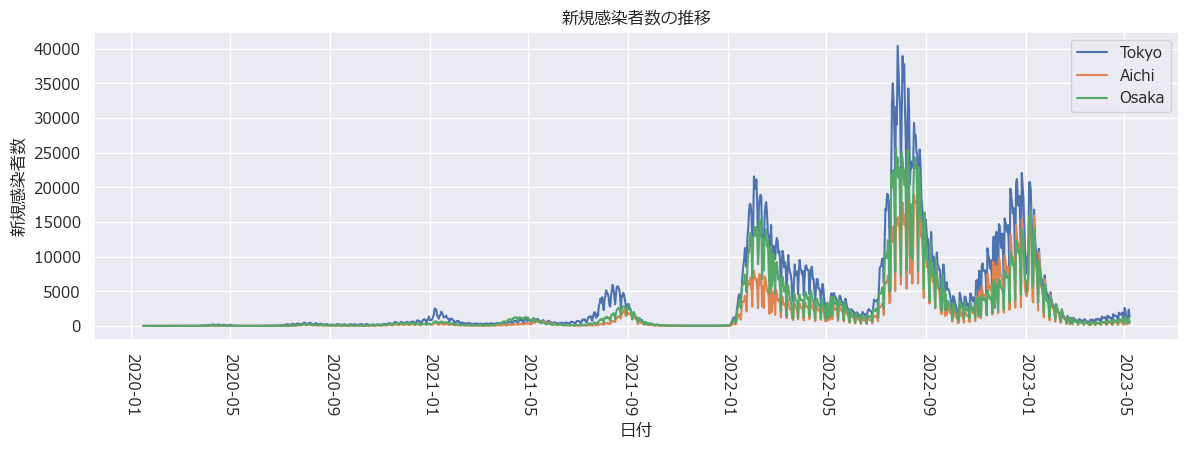

In [28]:
#practical
%matplotlib inline 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = [14,4])
ax.plot(data_yoko2.Date, data_yoko2.Tokyo, label="Tokyo")
ax.plot(data_yoko2.Date, data_yoko2.Aichi, label="Aichi")
ax.plot(data_yoko2.Date, data_yoko2.Osaka, label="Osaka")
ax.legend()
plt.title("新規感染者数の推移", fontname="Meiryo")
plt.xlabel("日付", fontname="Meiryo")
plt.ylabel("新規感染者数", fontname="Meiryo")
plt.xticks(rotation=-90)
plt.show()


## その他雑記メモ

* [Python でデータ分析するのに適したグラフツール3選（2019年の記事）](https://qiita.com/s_katagiri/items/26763fd39f3dd9756809)
* [Pythonの可視化パッケージの使い分け(2017年の記事）](https://qiita.com/alchemist/items/544d45480ce9c1ca2c16)